### Most common words

In [15]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,louis,dave,ricky,bo,bill,jim,john,hasan,ali,anthony,mike,joe
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
top_dict = {}

for i in data.columns:
    top = data[i].sort_values(ascending = False).head(40)
    top_dict[i] = list(zip(top.index,top.values)) # wartości
    
sort = sorted(top_dict.items())
# sort

In [17]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words]))
    print('*****')

louis
like, know, dont, thats, youre, life, thing, people, gonna, cause, there, every, shit, would, time, think, good, woman, right, theyre, really, mean, course, murder, even, always, come, kid, look, fuck, didnt, first, second, said, nobody, live, happened, sitting, kind, date
*****
dave
like, know, said, shit, people, didnt, time, dont, ahah, black, thats, fuck, fucking, woman, good, would, show, back, right, gonna, come, take, yeah, thing, every, want, even, rape, kevin, guy, first, think, dave, youre, really, cant, friend, looked, money, whats
*****
ricky
right, like, know, dont, said, yeah, fucking, thing, joke, youre, went, thats, people, year, didnt, little, theyre, would, going, never, back, first, come, there, saying, mean, even, think, tweet, chimp, always, nut, make, hampstead, much, well, time, woman, want, cant
*****
bo
voice, know, like, girl, love, think, robotic, stuff, repeat, dont, want, yeah, laughter, right, applause, slut, fucking, said, people, contact, prolonged

In [35]:
# top_dict[comedian]

#### Adding more words to stop words list

In [18]:
from collections import Counter

common_words = []
for comedian in data.columns:
    common = [word for (word, count) in top_dict[comedian]]
    for i in common:
        common_words.append(i)
        
# common_words

In [19]:
common = Counter(common_words).most_common()
common

[('like', 12),
 ('know', 12),
 ('dont', 12),
 ('thats', 12),
 ('youre', 12),
 ('people', 12),
 ('right', 12),
 ('time', 11),
 ('think', 11),
 ('thing', 10),
 ('want', 10),
 ('gonna', 9),
 ('would', 9),
 ('come', 9),
 ('fuck', 8),
 ('first', 8),
 ('said', 8),
 ('cause', 7),
 ('good', 7),
 ('woman', 7),
 ('really', 7),
 ('even', 7),
 ('didnt', 7),
 ('back', 7),
 ('yeah', 7),
 ('make', 7),
 ('shit', 6),
 ('theyre', 6),
 ('look', 6),
 ('fucking', 6),
 ('little', 6),
 ('going', 6),
 ('never', 6),
 ('there', 5),
 ('cant', 5),
 ('year', 5),
 ('well', 5),
 ('could', 5),
 ('life', 4),
 ('every', 4),
 ('mean', 4),
 ('show', 4),
 ('guy', 4),
 ('girl', 4),
 ('love', 4),
 ('tell', 4),
 ('always', 3),
 ('kind', 3),
 ('friend', 3),
 ('whats', 3),
 ('joke', 3),
 ('went', 3),
 ('dude', 3),
 ('okay', 3),
 ('baby', 3),
 ('white', 3),
 ('kid', 2),
 ('money', 2),
 ('laughter', 2),
 ('applause', 2),
 ('audience', 2),
 ('go', 2),
 ('house', 2),
 ('real', 2),
 ('shes', 2),
 ('walk', 2),
 ('parent', 2),
 ('sch

In [20]:
stop_words_list = [word for word, count in common if count > 6]
stop_words_list

['like',
 'know',
 'dont',
 'thats',
 'youre',
 'people',
 'right',
 'time',
 'think',
 'thing',
 'want',
 'gonna',
 'would',
 'come',
 'fuck',
 'first',
 'said',
 'cause',
 'good',
 'woman',
 'really',
 'even',
 'didnt',
 'back',
 'yeah',
 'make']

In [21]:
# update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_list)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop_words.pkl", "wb"))
data_stop.to_pickle("dtm_stop_words.pkl")

In [22]:
data1 = pd.read_pickle('dtm_stop_words.pkl')
data1 = data1.transpose()
data1

,louis,dave,ricky,bo,bill,jim,john,hasan,ali,anthony,mike,joe
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zero,2,0,0,1,1,0,0,1,0,0,1,0
zillion,0,0,0,0,1,0,0,0,0,0,0,0
zombie,0,0,0,0,2,0,0,0,1,0,0,0
zoning,0,0,0,0,1,0,0,0,0,0,0,0


In [23]:
top_dict1 = {}

for i in data1.columns:
    top = data1[i].sort_values(ascending = False).head(30)
    top_dict1[i] = list(zip(top.index,top.values))
    
top_dict1.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [24]:
for comedian, top_words in top_dict1.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('*****')

louis
life, shit, theyre, mean, course, murder, kid, look, second, live
*****
dave
shit, ahah, black, fucking, rape, kevin, guy, looked, money, friend
*****
ricky
fucking, joke, went, year, little, theyre, going, saying, mean, chimp
*****
bo
voice, girl, love, robotic, stuff, repeat, laughter, applause, slut, fucking
*****
bill
fucking, shit, dude, going, theyre, little, guy, doesnt, year, life
*****
jim
fucking, went, going, gun, theyre, audience, girl, cunt, girlfriend, shit
*****
john
clinton, little, went, wife, house, real, mean, baby, friend, shes
*****
hasan
laughter, going, love, shes, hasan, look, life, applause, girl, brown
*****
ali
shit, gotta, husband, wanna, pregnant, need, dude, asian, tell, year
*****
anthony
joke, anthony, guy, grandma, shark, tell, school, baby, okay, family
*****
mike
say, jenny, point, mean, friend, kind, feel, night, going, tell
*****
joe
fucking, theyre, shit, house, dude, kid, white, girl, real, life
*****


### Number of words (Vocabulary)

In [25]:
# Find the number of unique words that each comedian uses
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
9,Louis C.K.,980
0,Ali Wong,1081
3,Bo Burnham,1256
5,Hasan Minhaj,1280
8,John Mulaney,1319
1,Anthony Jeselnik,1331
6,Jim Jefferies,1343
11,Ricky Gervais,1382
10,Mike Birbiglia,1439
7,Joe Rogan,1499


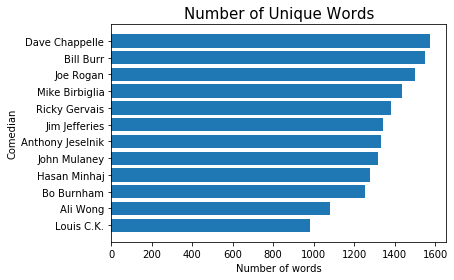

In [26]:
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(data_words))

plt.subplot(1, 1, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=15)
plt.xlabel('Number of words')
plt.ylabel('Comedian')

# plt.tight_layout()
plt.show()

### Profanity

In [27]:
common = Counter(common_words).most_common()
# common

In [28]:
# Let's isolate just these bad words
data_bad_words = data1.transpose()[['fucking', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking, data_bad_words.shit], axis=1)

data_profanity.columns = ['f_word', 's_word']
data_profanity.sort_values(by='f_word')

,f_word,s_word
mike,0,1
john,2,6
ali,5,35
louis,6,25
anthony,6,9
hasan,8,15
bo,23,7
dave,32,47
ricky,47,6
joe,69,40
